# Hubble Space Telescope Image Processing with Python

by **Beatriz Yordaky**








## Objective


Image processing is very important for Astronomy, as it can reveal properties and details previously imperceptible.

The main objective of this work is to **process raw images taken by the Hubble Space Telescope** of the NGC 5189 nebula. The final image is the result of combining images from different filters, showing the chemical composition of the object through colors.

In addition, segmentation and labeling techniques are implemented for counting stars and galaxies in the **hubble deep field** image.

## Database
The Hubble Space Telescope took several images of the same astronomical objects using different filters, each one bringing different information. On the official page one can find the final images processed by the project team:

- https://hubblesite.org/
- https://hubblesite.org/resource-gallery/images

For this project are used the raw images, which can be found at the link below:

- http://hst.esac.esa.int/ehst/#home

In general, images can be downloaded in .tar format.

### Finding the raw images of an astronomical object


**Example:** Orion Nebula (NGC 1976)
- Search for "NGC 1976" on the link http://hst.esac.esa.int/ehst/#home
- Add "filter", to identify which filter was used for each image taken:

![picture](https://drive.google.com/uc?export=view&id=1TiqZnGfv5NMxBOyXQHlsrfxIeAlGq_qe)

![picture](https://drive.google.com/uc?export=view&id=1dfeF5C_FlDdFXrkvV8FAtPbU6Vb15arM)

The image below is the original (raw) image taken of Orion Nebula with the F555W filter:

<div>
<img src="https://drive.google.com/uc?export=view&id=11f8H0H0UH0sFqVI_7wbksiNzKvzZnKTJ" width="300"/>
</div>

The image below features the processing and merging of images corresponding to the F435W (B), F555W (V), F658N (H-alpha), F775W (i) and F850LP(z) filters.

<div>
<img src="https://drive.google.com/uc?export=view&id=1j1x4mD5WPfrC9s9gsW0v_5mbNOF5miZ8" width="500"/>
</div>

Source: https://hubblesite.org/contents/media/images/3866-Image?keyword=ngc%201976

## Data Processing


In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow # for image display

### Nebulae image stacking

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1c0zCiQBJdlOa70jr_JV5jmDweOMqhaJv
To: /content/ibxl04010_drc_F673.jpg
100% 455k/455k [00:00<00:00, 70.2MB/s]
/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1JVtmURCFjbQHPpNcE7woX9Ut43ZVQW-r
To: /content/ibxl04020_F657.jpg
100% 286k/286k [00:00<00:00, 22.1MB/s]
/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.go

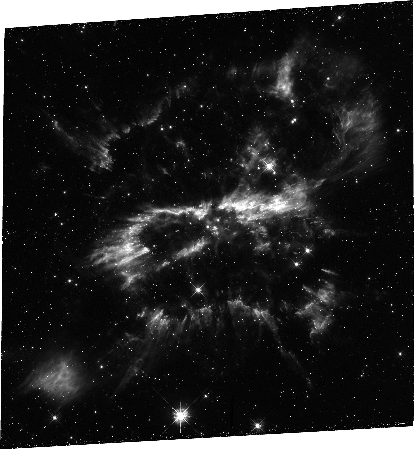

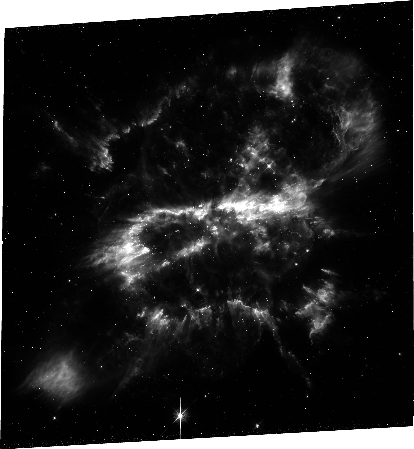

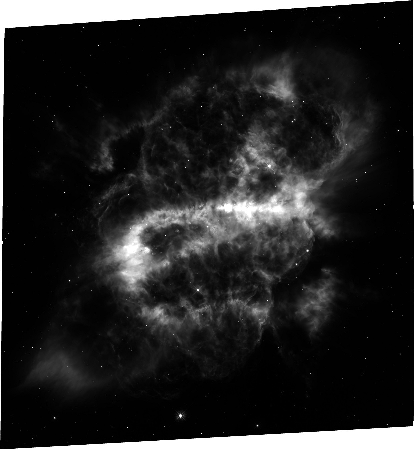

In [2]:
# NGC 5189

# download raw images
!gdown --id 1c0zCiQBJdlOa70jr_JV5jmDweOMqhaJv # 673nm filter
!gdown --id 1JVtmURCFjbQHPpNcE7woX9Ut43ZVQW-r # 657nm filter
!gdown --id 1AC648gCjCeKHiR6W5oXXtbwhOYBMlpFi # 502nm filter

r = cv2.imread("ibxl04010_drc_F673.jpg",0) # F673 - RED CHANNEL
g = cv2.imread("ibxl04020_F657.jpg",0)     # F657 - GREEN CHANNEL
b = cv2.imread("ibxl04040_drc_F502.jpg",0) # F502 - BLUE CHANNEL

# print raw images
cv2_imshow(r[::3,::3])
cv2_imshow(g[::3,::3])
cv2_imshow(b[::3,::3])

# match image sizes
width = int(r.shape[1])
height = int(r.shape[0])
dim = (width, height)

g = cv2.resize(g, dim)
b = cv2.resize(b, dim)

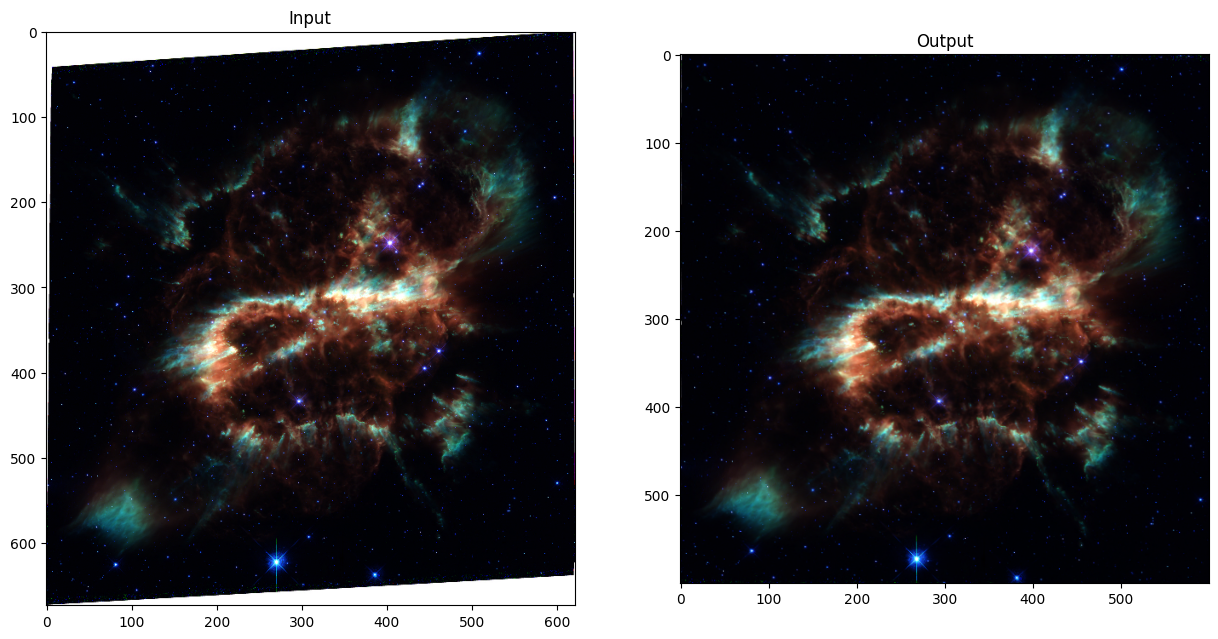

In [3]:
# stack images of the three channels (RED, GREEN, BLUE)
img_final = cv2.merge((r,g,b))
img_final = img_final[::2,::2]

# adjust deformation
pts1 = np.float32([[5,50],[610,0],[0,670],[610,630]])
pts2 = np.float32([[0,0],[600,0],[0,600],[600,600]])
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img_final,M,(600,600))

dst = cv2.cvtColor(dst,cv2.COLOR_BGR2RGB)
img_final = cv2.cvtColor(img_final,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(img_final),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')

plt.show()

### Segmentation and labeling of galaxies

In [4]:
import numpy as np      
import cv2      
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Ixn8M9wkYYazK1r7uUfOp7B-ySEdRVDL
To: /content/hubbleultradeepfield.jpg
100% 311k/311k [00:00<00:00, 72.1MB/s]



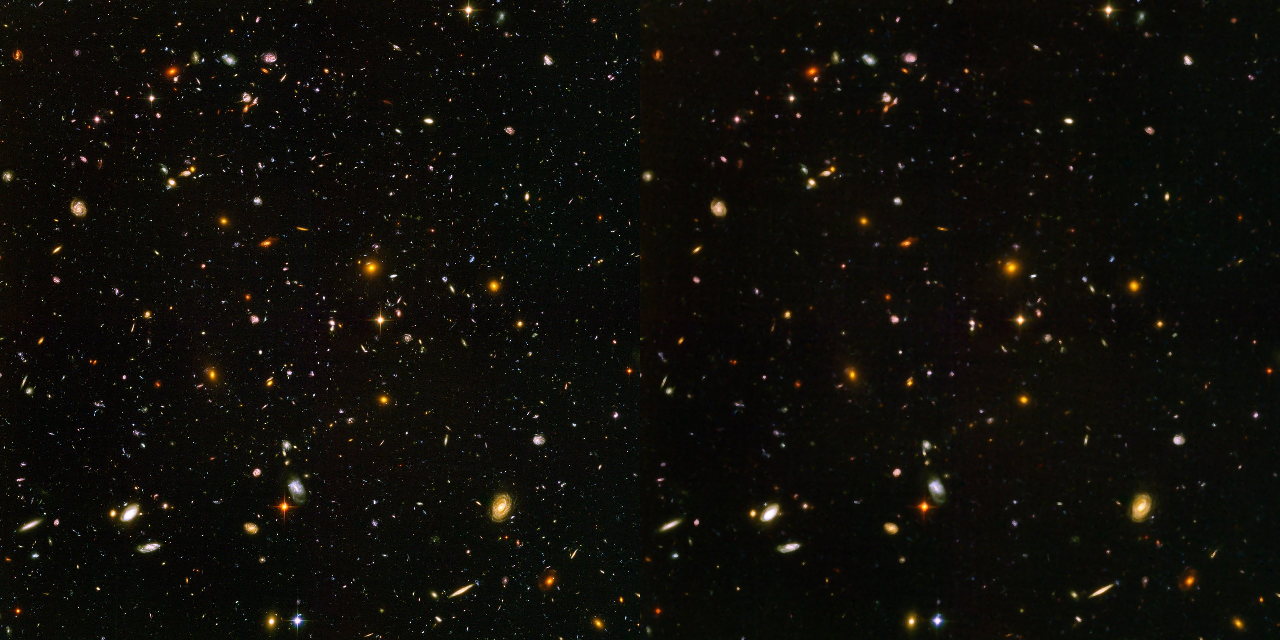

In [5]:
!gdown --id 1Ixn8M9wkYYazK1r7uUfOp7B-ySEdRVDL
img = cv2.imread('hubbleultradeepfield.jpg')
img = img[::2,::2]

print()

suave = np.vstack([
  np.hstack([img, cv2.medianBlur(img, 3)])
])

cv2_imshow(suave)

127.5
96.96559108163616
85.40034286331911
80.89308621164801
78.70187169040314
77.79232536131643
77.32634729478495
77.32634729478495


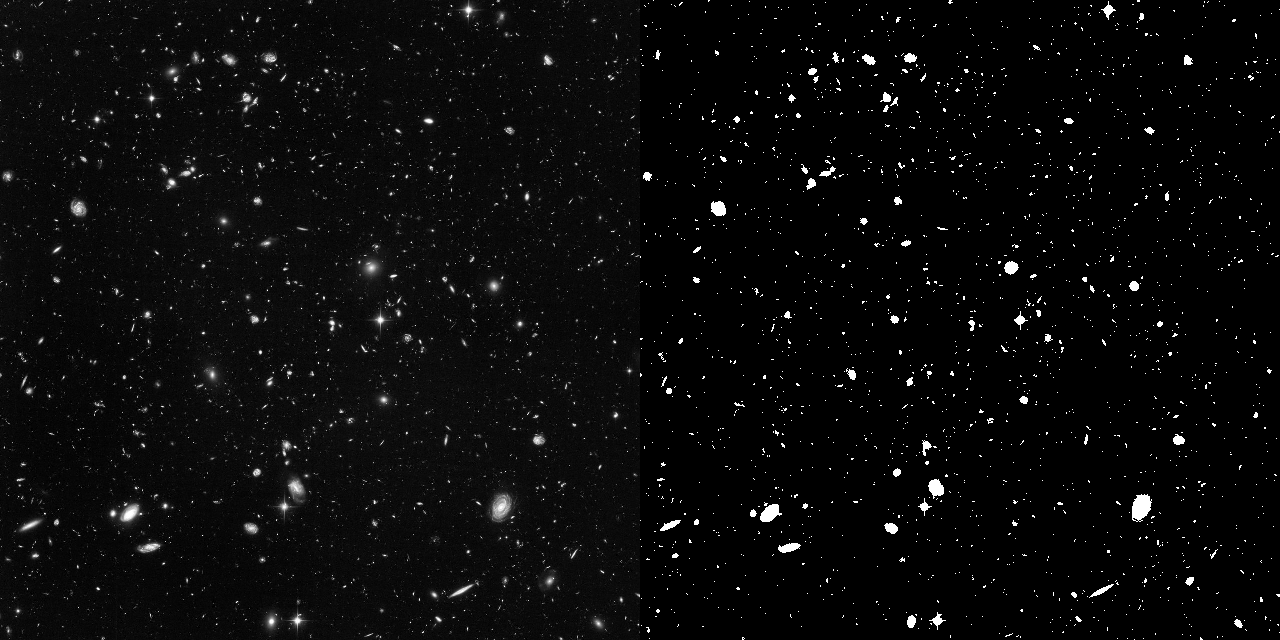

In [6]:
# SEGMENTATION OF THE IMAGE BY THRESHOLD
# OBJECTIVE: IDENTIFY/COUNT GALAXIES

f = cv2.imread('hubbleultradeepfield.jpg',0)
precisao = 0.0001

# ESTIMATE THE BEST THRESHOLD
T1 = (int(np.amin(f))+int(np.amax(f)))/2;
print(T1)
done = False; 
while ~done:
    g = (f >= T1)
    T1next = 0.5*(np.mean(f[g]) + np.mean(f[~g]))
    done = np.abs(T1 - T1next) < precisao
    T1 = T1next 
    print(T1)

T,s1 = cv2.threshold(f,T1,255,cv2.THRESH_BINARY)

imgs = np.vstack([
  np.hstack([f, s1])
])

cv2_imshow(imgs[::2,::2])

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Ixn8M9wkYYazK1r7uUfOp7B-ySEdRVDL
To: /content/hubbleultradeepfield.jpg
100% 311k/311k [00:00<00:00, 59.8MB/s]


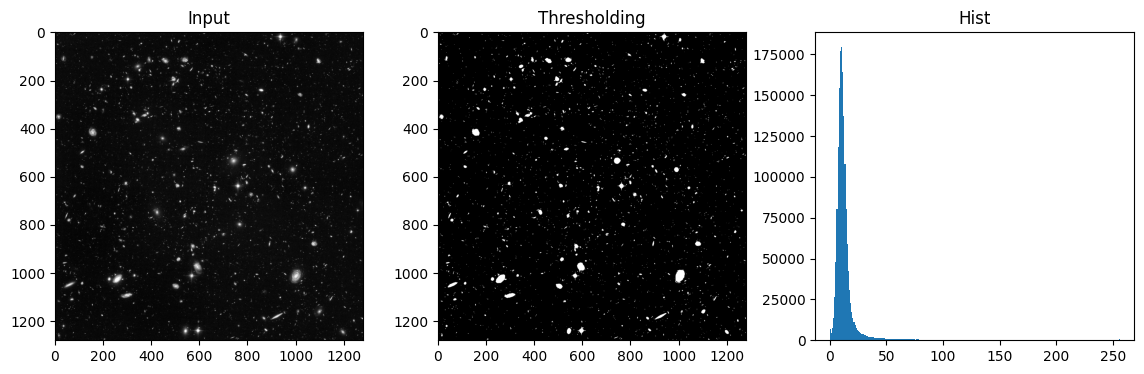

In [7]:
!gdown --id 1Ixn8M9wkYYazK1r7uUfOp7B-ySEdRVDL
f = cv2.imread("hubbleultradeepfield.jpg",0)

limiar = 78

plt.figure(figsize=(14,4))
plt.subplot(131),plt.imshow(f,"gray"),plt.title('Input')
plt.subplot(132),plt.imshow(f>limiar,"gray"),plt.title('Thresholding')
plt.subplot(133),plt.hist(f.ravel(),256,[0,256]),plt.title('Hist')
plt.show()

In [8]:
# LABELING
def myLabel(img):
  L,C = img.shape
  g = np.zeros(img.shape)
  cor = 1
  pilha = []
  tam_viz = 1
  for l in range(L):
    for c in range(C):

      if img[l,c] and not g[l,c]:

        pilha.append([l,c])

        while pilha:

          i,j=pilha.pop()

          g[i,j] = cor

          for x in range(-tam_viz,tam_viz+1):
            for y in range(-tam_viz,tam_viz+1):

              viz_i = i+x
              viz_j = j+y
              if 0 <= viz_i < L and 0 <= viz_j < C:

                if img[viz_i,viz_j] and not g[viz_i,viz_j]: 

                  pilha.append([viz_i,viz_j]) 

        cor+=1


  return cor

In [11]:
# galaxy count
qtd_galaxias = myLabel(s1)

print(qtd_galaxias, "galaxies were identified in the image.")

2713 were identified in the image.


## Conclusions

It was possible to successfully obtain the visual profile of the composition of a nebula from three different filters, associated with RGB color channels. Each color, in turn, identifies a chemical element (which emits light at that specific wavelength). Thus, one can observe the chemical richness of the object, from images initially in grayscale. The technique can be applied to other astronomical objects of interest.

Although the technique employed is limited to the use of only 3 different filters when associating them with the RGB channels, the result obtained was satisfactory.

![picture](https://drive.google.com/uc?export=view&id=1oWu5SlCn08FTW8qsG9HLLWFnTwtHxBh0)

Besides that, the use of segmentation and labeling techniques was very useful to identify stars and galaxies in images that contained many of these objects. The image used for the galaxy count, **hubble deep field**, is an image made of a very small region of the sky (about 0.04 degrees), and even so we arrived at the result that it presents almost 2,713 galaxies, a result that shows us that **the universe has had many galaxies for a long time**.

![picture](https://drive.google.com/uc?export=view&id=1xtQ6T-GWYDbB_La8k704Hf5Y2sXO8iHd)

## Future works

With the aim of making the processed images closer to reality, in a future work I would use a more diverse range of colors to stack images of more nebula filters, instead of working only with the RGB range. And also, implement different techniques to differentiate stars from galaxies in the images.

## References

- Hubble Telescope Image Processing - https://www.youtube.com/watch?v=BgklkUPwPNA
- Light & Filters - http://hubble.stsci.edu/gallery/behind_the_pictures/meaning_of_color/filters.php
- A short introduction to astronomical image processing - https://esahubble.org/projects/fits_liberator/improc/
- PixInsight : Dynamic narrowband combinations with PixelMath - https://thecoldestnights.com/2020/06/pixinsight-dynamic-narrowband-combinations-with-pixelmath/
- Orion Nebula - https://hubblesite.org/contents/media/images/3866-Image?keyword=ngc%201976
- Process Your Own Hubble Images - https://www.youtube.com/watch?v=SB4L2nrc5kw
